<a href="https://colab.research.google.com/github/eumoas/Projetos-Python/blob/main/Dadoseduca%C3%A7%C3%A3o_Conselho_Nacional_de_Justi%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <font color='white'>
# <font color='white'>Conselho Nacional de Justiça - Analytics</font>

## <font color='purple'>Miriam O A Sobral</font> eumoas@gmail.com


## Definição do Problema

Compreensão da relação entre as taxa_bruta_matricula_pre_escola em municípios brasileiros.  

## Fonte de Dados

O Observatório da Criança e do Adolescente é um espaço virtual que possibilita a consulta, em um mesmo lugar, dos principais indicadores sociais relacionados direta e indiretamente à infância e adolescência no Brasil. Seu objetivo é organizar as informações e facilitar o acesso a bases de dados de diversas fontes púbicas e privadas sobre população, qualidade de vida e bem-estar de crianças e adolescentes com idades ente zero e 18 anos, permitindo uma análise da evolução das principais políticas, dos desafios e das desigualdades regionais. Destina-se a formadores de opinião, representantes da sociedade civil, pesquisadores, gestores públicos e quaisquer pessoas que queiram, a partir de um simples mecanismo de busca online, conhecer a realidade e os problemas sociais que mais afetam as crianças e os adolescentes no país.
Organização

Fundação Abrinq

Cobertura temporal

2010 - 2019

## Dicionário de Dados

ano

id_municipio

taxa_bruta_matricula_pre_escola

numero_absoluto_bruto_matricula_pre_escola

taxa_liquida_matricula_pre_escola

numero_absoluto_liquido_matricula_pre_escola

## Instalando e Carregando os Pacotes

In [ ]:
!pip install -q -U watermark

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Miriam O. A Sobral" --iversions

Author: Miriam O. A Sobral

seaborn   : 0.13.2
sklearn   : 1.6.0
numpy     : 1.26.4
matplotlib: 3.10.0
pandas    : 2.2.2



## Carregando e Compreendendo os Dados

In [ ]:
# Carrega o dataset
#Conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/I2A2/br_abrinq_oca_municipio_primeira_infancia.csv', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Shape
df.shape

(55700, 6)

In [ ]:
# Visualiza os dados
df.head()

,ano,id_municipio,taxa_bruta_matricula_pre_escola,numero_absoluto_bruto_matricula_pre_escola,taxa_liquida_matricula_pre_escola,numero_absoluto_liquido_matricula_pre_escola
0,2010,1100015,54.6,452.0,30.0,248.0
1,2011,1100015,60.6,475.0,32.1,252.0
2,2012,1100015,62.1,484.0,34.0,265.0
3,2013,1100015,67.0,559.0,57.3,478.0
4,2014,1100015,45.2,376.0,36.8,306.0


## Análise Exploratória

In [ ]:
# Tipos de dados
df.dtypes

,0
ano,int64
id_municipio,int64
taxa_bruta_matricula_pre_escola,float64
numero_absoluto_bruto_matricula_pre_escola,float64
taxa_liquida_matricula_pre_escola,float64
numero_absoluto_liquido_matricula_pre_escola,float64


In [ ]:
# Resumo estatístico
df.describe()

,ano,id_municipio,taxa_bruta_matricula_pre_escola,numero_absoluto_bruto_matricula_pre_escola,taxa_liquida_matricula_pre_escola,numero_absoluto_liquido_matricula_pre_escola
count,55700.000000,5.570000e+04,55685.000000,55685.000000,55675.000000,55695.000000
mean,2014.500000,3.253591e+06,85.558066,888.268618,70.550827,734.369908
std,2.872307,9.848308e+05,21.611292,4945.494719,20.031499,4167.238814
min,2010.000000,1.100015e+06,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.512101e+06,73.100000,128.000000,58.100000,105.000000
50%,2014.500000,3.146280e+06,85.300000,291.000000,70.900000,238.000000
75%,2017.000000,4.119202e+06,97.200000,675.000000,83.200000,550.000000
max,2019.000000,5.300108e+06,290.500000,347160.000000,246.300000,277130.000000


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

,0
ano,0
id_municipio,0
taxa_bruta_matricula_pre_escola,15
numero_absoluto_bruto_matricula_pre_escola,15
taxa_liquida_matricula_pre_escola,25
numero_absoluto_liquido_matricula_pre_escola,5


### Tratamento de Valores Ausentes com Backfilling e Interpolação

In [ ]:
# Shape
df.shape

(55700, 6)

In [ ]:
# Visualiza os dados
df.head()

,ano,id_municipio,taxa_bruta_matricula_pre_escola,numero_absoluto_bruto_matricula_pre_escola,taxa_liquida_matricula_pre_escola,numero_absoluto_liquido_matricula_pre_escola
0,2010,1100015,54.6,452.0,30.0,248.0
1,2011,1100015,60.6,475.0,32.1,252.0
2,2012,1100015,62.1,484.0,34.0,265.0
3,2013,1100015,67.0,559.0,57.3,478.0
4,2014,1100015,45.2,376.0,36.8,306.0


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

,0
ano,0
id_municipio,0
taxa_bruta_matricula_pre_escola,15
numero_absoluto_bruto_matricula_pre_escola,15
taxa_liquida_matricula_pre_escola,25
numero_absoluto_liquido_matricula_pre_escola,5


In [ ]:
# Limpando valores ausentes através de backfilling e interpolação
df['taxa_bruta_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
df['numero_absoluto_bruto_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
df['taxa_liquida_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
df['numero_absoluto_liquido_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
df = df.interpolate()

<ipython-input-67-c7c05b78e59d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['taxa_bruta_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
<ipython-input-67-c7c05b78e59d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['numero_absoluto_bruto_matricula_pre_escola'].fillna(method = 'bfill', inplace = True)
<ipython-input-67-c7c05b78e59d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a 

In [ ]:
# Verificando valores ausentes
df.isnull().sum()

,0
ano,0
id_municipio,0
taxa_bruta_matricula_pre_escola,15
numero_absoluto_bruto_matricula_pre_escola,15
taxa_liquida_matricula_pre_escola,25
numero_absoluto_liquido_matricula_pre_escola,5


## Análise de Dados

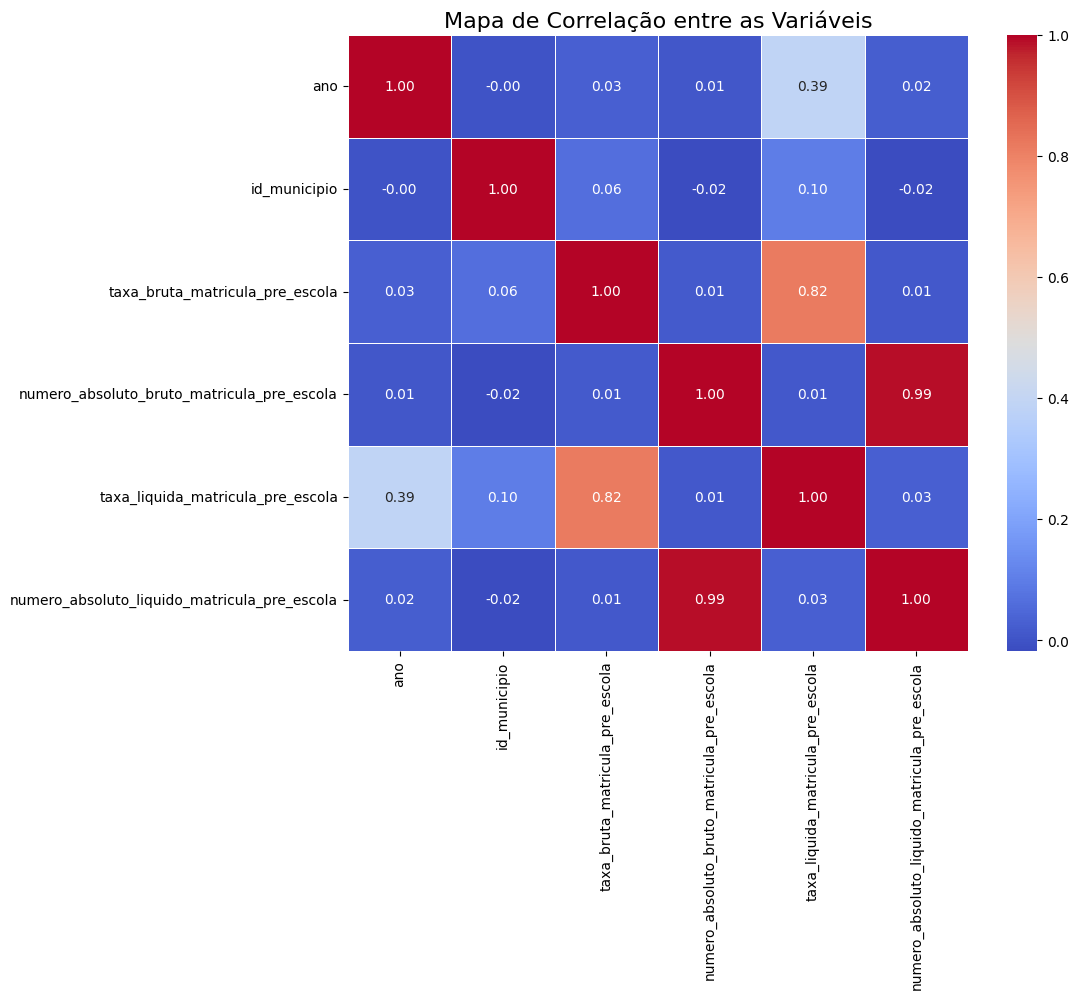

In [ ]:

# Calcular a correlação entre as variáveis numéricas
correlacao = df.corr()

# Criar o mapa de correlação (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Adicionar título
plt.title('Mapa de Correlação entre as Variáveis', fontsize=16)
plt.show()


Como era de se esperar há uma relação extremamente forte entre essas variáveis, indicando que o número bruto e líquido de matrículas em pré-escolas seguem tendências quase idênticas. Isso faz sentido, pois ambas estão relacionadas diretamente ao total de matrículas, com o número líquido sendo um subconjunto do número bruto.

A relação moderada entre ano e taxa_liquida_matricula_pre_escola sugere melhorias ao longo do tempo, mas é importante investigar quais fatores impulsionaram esse crescimento para replicar em outros cenários.

1. Análise da Evolução das Taxas Líquidas de Matrícula (2010–2019)

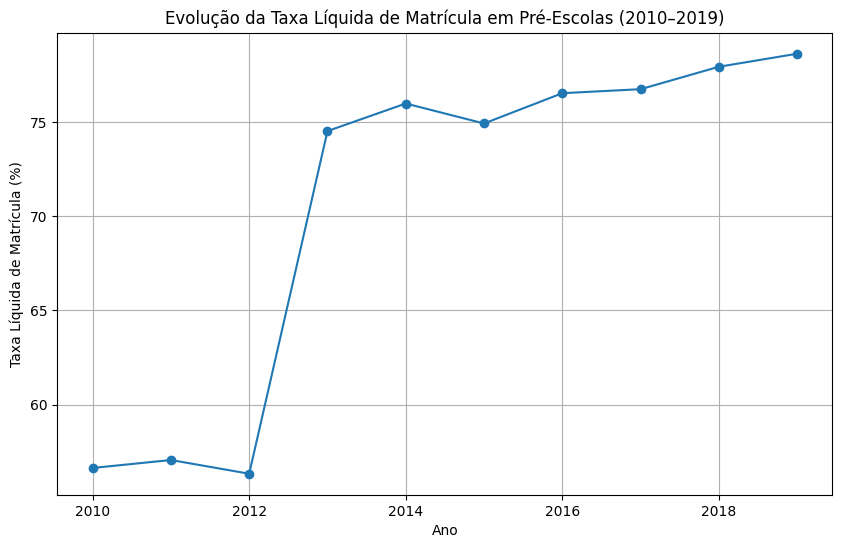

In [ ]:
# Agregar por ano (média nacional)
taxas_liquidas = df.groupby('ano')['taxa_liquida_matricula_pre_escola'].mean()

# Visualizar a tendência
plt.figure(figsize=(10, 6))
plt.plot(taxas_liquidas.index, taxas_liquidas.values, marker='o', linestyle='-')
plt.title('Evolução da Taxa Líquida de Matrícula em Pré-Escolas (2010–2019)')
plt.xlabel('Ano')
plt.ylabel('Taxa Líquida de Matrícula (%)')
plt.grid()
plt.show()

 A partir de 2011, há um grande salto nas taxas de matrícula, subindo de valores abaixo de 65% para mais de 75%. Isso pode sugerir um aumento significativo na oferta de vagas ou uma mudança nas políticas públicas relacionadas à matrícula em pré-escolas nesse período. Esse pico entre 2011 e 2012 merece investigação para entender o que causou essa grande variação.

Crescimento estável após 2012:

Após o aumento inicial, as taxas de matrícula continuam a crescer de forma mais gradual até 2019. Isso indica uma tendência de crescimento estável, mas sem mudanças tão acentuadas quanto o salto inicial.

In [ ]:
# Carregando o dataset limpo
df = pd.read_csv('/content/br_abrinq_oca_municipio_primeira_infancia.csv')

2. Correlação entre Número Absoluto Bruto de Matrículas e Taxa Bruta

Coeficiente: 7.087377069724909e-05
Intercepto: 85.40998696386798
Erro Quadrático Médio (MSE): 478.10485647226295
R²: -0.00020654168367872927


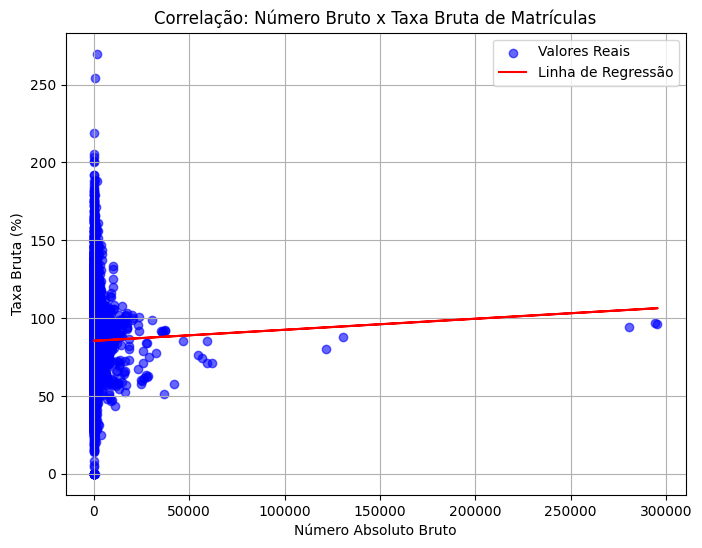

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Selecionar variáveis
X = df[['numero_absoluto_bruto_matricula_pre_escola']]
y = df['taxa_bruta_matricula_pre_escola']

# Dividir treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação
print("Coeficiente:", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("Erro Quadrático Médio (MSE):", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Visualização
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Linha de Regressão')
plt.title('Correlação: Número Bruto x Taxa Bruta de Matrículas')
plt.xlabel('Número Absoluto Bruto')
plt.ylabel('Taxa Bruta (%)')
plt.legend()
plt.grid()
plt.show()

Resposta: Pelo gráfico acima vemos que foi no ano de 2010 o maior crescimento do PIB Per Capita no período analisado.

3. Clusterização para Identificar Municípios com Padrões Semelhantes

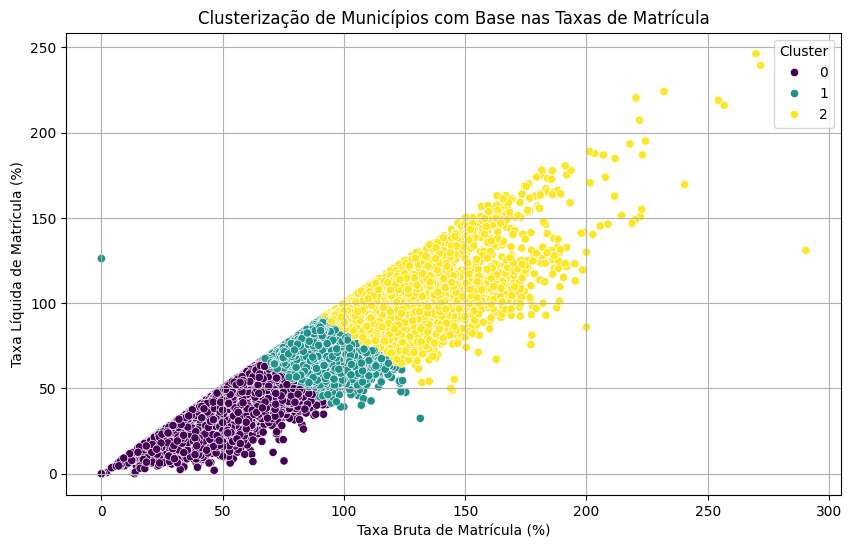

         taxa_bruta_matricula_pre_escola  taxa_liquida_matricula_pre_escola
cluster                                                                    
0                              60.728551                          46.315530
1                              86.347600                          71.985434
2                             113.826075                          96.322283


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis de interesse
variaveis = df[['taxa_bruta_matricula_pre_escola', 'taxa_liquida_matricula_pre_escola']]

# Padronizar os dados
scaler = StandardScaler()
variaveis_scaled = scaler.fit_transform(variaveis)

# Definir o modelo de clusterização
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(variaveis_scaled)

# Visualizar clusters
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='taxa_bruta_matricula_pre_escola', y='taxa_liquida_matricula_pre_escola',
                hue='cluster', data=df, palette='viridis')
plt.title('Clusterização de Municípios com Base nas Taxas de Matrícula')
plt.xlabel('Taxa Bruta de Matrícula (%)')
plt.ylabel('Taxa Líquida de Matrícula (%)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Exibir a média de cada cluster
print(df.groupby('cluster')[['taxa_bruta_matricula_pre_escola', 'taxa_liquida_matricula_pre_escola']].mean())


Interessante observar que o modelo de regressão sugeriu a criação de três clusters:     

    Cluster 0 (Roxo): Localiza-se predominantemente na região inferior esquerda do gráfico, indicando valores mais baixos para ambas as taxas de matrícula bruta e líquida.

    Cluster 1 (Teal): Ocupa a região central, mostrando valores moderados para ambas as taxas.

    Cluster 2 (Amarelo): Está na região superior direita, representando valores mais altos para ambas as taxas de matrícula bruta e líquida.

Essa análise de clusters é importante pois demonstra visualmente como os municípios podem ser agrupados com base nas suas taxas de matrícula, o que pode ser útil para identificar padrões e tomar decisões políticas educacionais.

In [ ]:
!pip install nbconvert


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf <Dadoseducação_abrinq.ipynb>.ipynb

/bin/bash: line 1: Dadoseducação_abrinq.ipynb: No such file or directory


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-fonts-recommended set to manually installed.
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-plain-generic set to manually installed.
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
!jupyter nbconvert --to pdf /content/Dadoseducacao.ipynb

[NbConvertApp] Converting notebook /content/Dadoseducacao.ipynb to pdf
[NbConvertApp] Support files will be in Dadoseducacao_files/
[NbConvertApp] Making directory ./Dadoseducacao_files
[NbConvertApp] Writing 66808 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 339769 bytes to /content/Dadoseducacao.pdf


# Fim